# Import modules and dataset

In [12]:
# Import modules

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Import dataframe -- had a dtype error when importing so specified dtype for flagged columns

df = pd.read_csv('approved_data_2016_2018.csv', dtype={"url": "string", "debt_settlement_flag": str, "debt_settlement_flag_date": str, "settlement_status": "string"})

/Users/kirstenbjornson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (19,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,chargeoff_within_12_mths,delinq_amnt,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,421097,130954621,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,...,1.0,0.0,Cash,N,NaN,<NA>,NaN,NaN,NaN,NaN
1,421098,130964697,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,...,0.0,0.0,Cash,N,NaN,<NA>,NaN,NaN,NaN,NaN
2,421099,130955326,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,...,0.0,0.0,Cash,N,NaN,<NA>,NaN,NaN,NaN,NaN
3,421100,130504052,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,...,0.0,0.0,Cash,N,NaN,<NA>,NaN,NaN,NaN,NaN
4,421101,130956066,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,...,0.0,0.0,Cash,N,NaN,<NA>,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
# Drop columns that I don't anticipate needing for my analysis and/or are redundant

df2 = df.drop(['Unnamed: 0', 'url', 'desc', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term'], axis=1)

In [5]:
df2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,disbursement_method,debt_settlement_flag
0,130954621,5000.0,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,...,1.0,Individual,NaN,NaN,NaN,0.0,1.0,0.0,Cash,N
1,130964697,15000.0,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,...,1.0,Individual,NaN,NaN,NaN,0.0,0.0,0.0,Cash,N
2,130955326,11200.0,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,...,1.0,Joint App,81000.0,31.94,Not Verified,0.0,0.0,0.0,Cash,N
3,130504052,25000.0,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,...,1.0,Individual,NaN,NaN,NaN,0.0,0.0,0.0,Cash,N
4,130956066,3000.0,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,...,1.0,Individual,NaN,NaN,NaN,0.0,0.0,0.0,Cash,N


In [6]:
# Take a look at shape, drop duplicates -- recheck to see if anything was dropped (there was not)

df2.shape

(1373228, 47)

In [7]:
df2 = df2.drop_duplicates()

In [8]:
df2.shape

(1373228, 47)

In [9]:
# Checking to see if there is any difference between 'loan_amount' and 'funded_amnt' column and filling in same values with NaN

df2['new'] = np.where((df['loan_amnt'] != df['funded_amnt']), df['loan_amnt'], np.nan)

In [10]:
df2['new'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: new, dtype: float64

In [11]:
# Counting NaN values and comparing it to length of dataset. Only 3 are not null, so I think it's safe to drop this column

print(df2['new'].notnull().sum())

3


In [12]:
df2['new'] = np.where((df['loan_amnt'] != df['funded_amnt_inv']), df['loan_amnt'], np.nan)

In [13]:
# There is a difference of around 50K between 'loan_amnt' and 'funded_amnt_inv' (3.6% of whole dataset) 

print(df2['new'].notnull().sum())

50517


In [9]:
df2 = df2.drop(['funded_amnt'], axis=1)

# Analysis

### Question 1: How is loan volume changing over time? Is there any seasonality to their loan origination?

Compare loan count for each date and separate by year so each year can be easily compared. Look for trends. 
Time series analysis may be a better way to detect seasonality if there is more time.

In [39]:
# Look at unique values in issue_d column

df2.issue_d.unique()

array(['Mar-2018', 'Feb-2018', 'Jan-2018', 'Sep-2017', 'Aug-2017',
       'Jul-2017', 'Jun-2016', 'May-2016', 'Apr-2016', 'Sep-2018',
       'Aug-2018', 'Jul-2018', 'Jun-2017', 'May-2017', 'Apr-2017',
       'Mar-2016', 'Feb-2016', 'Jan-2016', 'Dec-2018', 'Nov-2018',
       'Oct-2018', 'Jun-2018', 'May-2018', 'Apr-2018', 'Mar-2017',
       'Feb-2017', 'Jan-2017', 'Sep-2016', 'Aug-2016', 'Jul-2016',
       'Dec-2017', 'Nov-2017', 'Oct-2017', 'Dec-2016', 'Nov-2016',
       'Oct-2016'], dtype=object)

In [40]:
# Convert object dtype to datetime for 'issue_d'

df2['issue_d'] =  pd.to_datetime(df2['issue_d'], format='%b-%Y')

In [42]:
df2['issue_d'].head()

0   2018-03-01
1   2018-03-01
2   2018-03-01
3   2018-03-01
4   2018-03-01
Name: issue_d, dtype: datetime64[ns]

In [46]:
# Sort values by date

df_sorted = df2.sort_values(by=['issue_d'])

In [47]:
df_sorted['issue_d']

686613   2016-01-01
674073   2016-01-01
674074   2016-01-01
674075   2016-01-01
674076   2016-01-01
            ...    
722706   2018-12-01
722705   2018-12-01
722704   2018-12-01
722711   2018-12-01
696169   2018-12-01
Name: issue_d, Length: 1373228, dtype: datetime64[ns]

In [52]:
# Count number of entries in each date category

loan_counts = df_sorted['issue_d'].value_counts()

In [53]:
# Create a .csv so I can move to Google Sheets to graph

loan_counts.to_csv('loan_counts.csv')

### Question 2: This company assigns loan grades (A-G) to each loan. Is their grading system indicative of performance? Why/why not?

My idea here is to look at loan grade vs the current performance of the loan, which would be the 'loan_status' column. After looking at the different status categories, I will assign them to 2 categories, "good" or "bad" performance. Then show a graph depicting each grade (A-G), and percentage of "bad" loans in each category. Theoretically we would have more bad loans in higher risk categories.

In [59]:
# Just double-checking unique values for grade and loan_status

df2.grade.unique()

array(['D', 'B', 'G', 'A', 'C', 'E', 'F'], dtype=object)

In [58]:
df2.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'In Grace Period', 'Default'], dtype=object)

In [61]:
# "Good" performance includes "Current" and "Fully Paid"
# "Bad" performance includes "Charged Off", "Default", "Late (16-30 days)", and "Late (31-120 days)"
# "In Grace Period" is not yet indicative of good or bad performance, so these rows can be dropped
# Perhaps we can make a 3rd "At Risk" category for "Late" payments

df2.loan_status.value_counts()

Current               823093
Fully Paid            402449
Charged Off           116257
Late (31-120 days)     19771
In Grace Period         7623
Late (16-30 days)       3997
Default                   38
Name: loan_status, dtype: int64

In [62]:
# Create new df with only the 2 factors we are concerned with

df_new = df2[['loan_status', 'grade']]

In [64]:
# Drop 'In Grace Period' rows

df_dropped = df_new[df_new['loan_status'] != 'In Grace Period']

In [65]:
df_dropped.loan_status.value_counts()

Current               823093
Fully Paid            402449
Charged Off           116257
Late (31-120 days)     19771
Late (16-30 days)       3997
Default                   38
Name: loan_status, dtype: int64

In [73]:
percent = df_dropped.groupby(['loan_status', 'grade'])['grade'].count()
print(percent)

loan_status         grade
Charged Off         A          6047
                    B         23506
                    C         39777
                    D         25612
                    E         13296
                    F          5733
                    G          2286
Current             A        193895
                    B        250585
                    C        236584
                    D        103023
                    E         30367
                    F          6557
                    G          2082
Default             A             5
                    B             6
                    C             8
                    D            13
                    E             5
                    F             1
Fully Paid          A         82613
                    B        127725
                    C        116675
                    D         49339
                    E         18484
                    F          5632
                    G          1981
La

In [75]:
percent2 = df_dropped.groupby(['grade', 'loan_status'])['loan_status'].count()
print(percent2)

grade  loan_status       
A      Charged Off             6047
       Current               193895
       Default                    5
       Fully Paid             82613
       Late (16-30 days)        337
       Late (31-120 days)      1302
B      Charged Off            23506
       Current               250585
       Default                    6
       Fully Paid            127725
       Late (16-30 days)        951
       Late (31-120 days)      4551
C      Charged Off            39777
       Current               236584
       Default                    8
       Fully Paid            116675
       Late (16-30 days)       1355
       Late (31-120 days)      7017
D      Charged Off            25612
       Current               103023
       Default                   13
       Fully Paid             49339
       Late (16-30 days)        888
       Late (31-120 days)      4333
E      Charged Off            13296
       Current                30367
       Default                    5
  

In [76]:
percent2/df_dropped.groupby('grade')['grade'].count()*100

grade  loan_status       
A      Charged Off            2.127734
       Current               68.225082
       Default                0.001759
       Fully Paid            29.068716
       Late (16-30 days)      0.118579
       Late (31-120 days)     0.458130
B      Charged Off            5.770836
       Current               61.519822
       Default                0.001473
       Fully Paid            31.357101
       Late (16-30 days)      0.233475
       Late (31-120 days)     1.117292
C      Charged Off            9.909172
       Current               58.937362
       Default                0.001993
       Fully Paid            29.065857
       Late (16-30 days)      0.337555
       Late (31-120 days)     1.748062
D      Charged Off           13.979739
       Current               56.232806
       Default                0.007096
       Fully Paid            26.930593
       Late (16-30 days)      0.484695
       Late (31-120 days)     2.365071
E      Charged Off           20.677750

In [77]:
data_final = percent2/df_dropped.groupby('grade')['grade'].count()*100

In [78]:
# Put to csv to look at in Gsheets

data_final.to_csv('loan_status_vs_grade.csv')

### Question 3: Outside of loan grade, what else would you say are borrower characteristics that affect loan performance?

In [80]:
df2.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,disbursement_method,debt_settlement_flag,new
0,130954621,5000.0,5000.0,36 months,20.39,186.82,D,D4,General Manager,8 years,...,Individual,NaN,NaN,NaN,0.0,1.0,0.0,Cash,N,NaN
1,130964697,15000.0,15000.0,36 months,9.92,483.45,B,B2,IT Director,2 years,...,Individual,NaN,NaN,NaN,0.0,0.0,0.0,Cash,N,NaN
2,130955326,11200.0,11200.0,60 months,30.79,367.82,G,G1,Client services,< 1 year,...,Joint App,81000.0,31.94,Not Verified,0.0,0.0,0.0,Cash,N,NaN
3,130504052,25000.0,25000.0,60 months,21.85,688.35,D,D5,Asphalt Supervisor,10+ years,...,Individual,NaN,NaN,NaN,0.0,0.0,0.0,Cash,N,NaN
4,130956066,3000.0,3000.0,36 months,7.34,93.10,A,A4,Scale Technician,9 years,...,Individual,NaN,NaN,NaN,0.0,0.0,0.0,Cash,N,NaN


In [81]:
df2.term.value_counts()

 36 months    988585
 60 months    384643
Name: term, dtype: int64

In [82]:
# Note - lots of employer types
# in the future, split these into broader categories perhaps (ie. business, medical, etc)
# to see if there are trends across broader categories

df2.emp_title.value_counts()

Teacher                               25352
Manager                               23058
Owner                                 16601
Driver                                11184
Registered Nurse                      10342
                                      ...  
Vice President - Wholesale Lending        1
VP Model Validation Manager               1
maint.tech                                1
Clearance Coordinator                     1
Current Operations Officer                1
Name: emp_title, Length: 279456, dtype: int64

In [83]:
df2.emp_length.value_counts()

10+ years    456411
2 years      124804
< 1 year     119380
3 years      110725
1 year        91308
4 years       84075
5 years       83989
6 years       59676
7 years       48096
8 years       47957
9 years       44735
Name: emp_length, dtype: int64

In [84]:
df2.application_type.value_counts()

Individual    1253029
Joint App      120199
Name: application_type, dtype: int64

In [85]:
df2.dtypes

id                                    int64
loan_amnt                           float64
funded_amnt_inv                     float64
term                                 object
int_rate                            float64
installment                         float64
grade                                object
sub_grade                            object
emp_title                            object
emp_length                           object
home_ownership                       object
annual_inc                          float64
verification_status                  object
issue_d                      datetime64[ns]
loan_status                          object
pymnt_plan                           object
purpose                              object
title                                object
zip_code                             object
addr_state                           object
dti                                 float64
delinq_2yrs                         float64
earliest_cr_line                

In [14]:
# Drop some more columns to create a dataset that consists of "borrower characteristics"

df2 = df2.drop(['title', 'next_pymnt_d', 'policy_code', 'emp_title', 'id', 'funded_amnt_inv', 'sub_grade', 
               'issue_d', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
               'policy_code'], axis = 1)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373228 entries, 0 to 1373227
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   loan_amnt                  1373228 non-null  float64
 1   term                       1373228 non-null  object 
 2   int_rate                   1373228 non-null  float64
 3   installment                1373228 non-null  float64
 4   grade                      1373228 non-null  object 
 5   emp_length                 1271156 non-null  object 
 6   home_ownership             1373228 non-null  object 
 7   annual_inc                 1373228 non-null  float64
 8   verification_status        1373228 non-null  object 
 9   loan_status                1373228 non-null  object 
 10  pymnt_plan                 1373228 non-null  object 
 11  purpose                    1373228 non-null  object 
 12  dti                        1371519 non-null  float64
 13  delinq_2yrs 

In [16]:
df_d = pd.get_dummies(df2)

In [17]:
df_d.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,...,purpose_wedding,application_type_Individual,application_type_Joint App,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y
0,5000.0,20.39,186.82,50000.0,21.80,1.0,665.0,669.0,0.0,9.0,...,0,1,0,0,0,0,1,0,1,0
1,15000.0,9.92,483.45,196000.0,18.29,0.0,700.0,704.0,0.0,65.0,...,0,1,0,0,0,0,1,0,1,0
2,11200.0,30.79,367.82,44000.0,43.97,1.0,665.0,669.0,2.0,6.0,...,0,0,1,1,0,0,1,0,1,0
3,25000.0,21.85,688.35,65000.0,12.89,1.0,665.0,669.0,1.0,22.0,...,0,1,0,0,0,0,1,0,1,0
4,3000.0,7.34,93.10,52000.0,0.58,0.0,760.0,764.0,0.0,26.0,...,0,1,0,0,0,0,1,0,1,0


In [18]:
corrMat = df_d.corr()

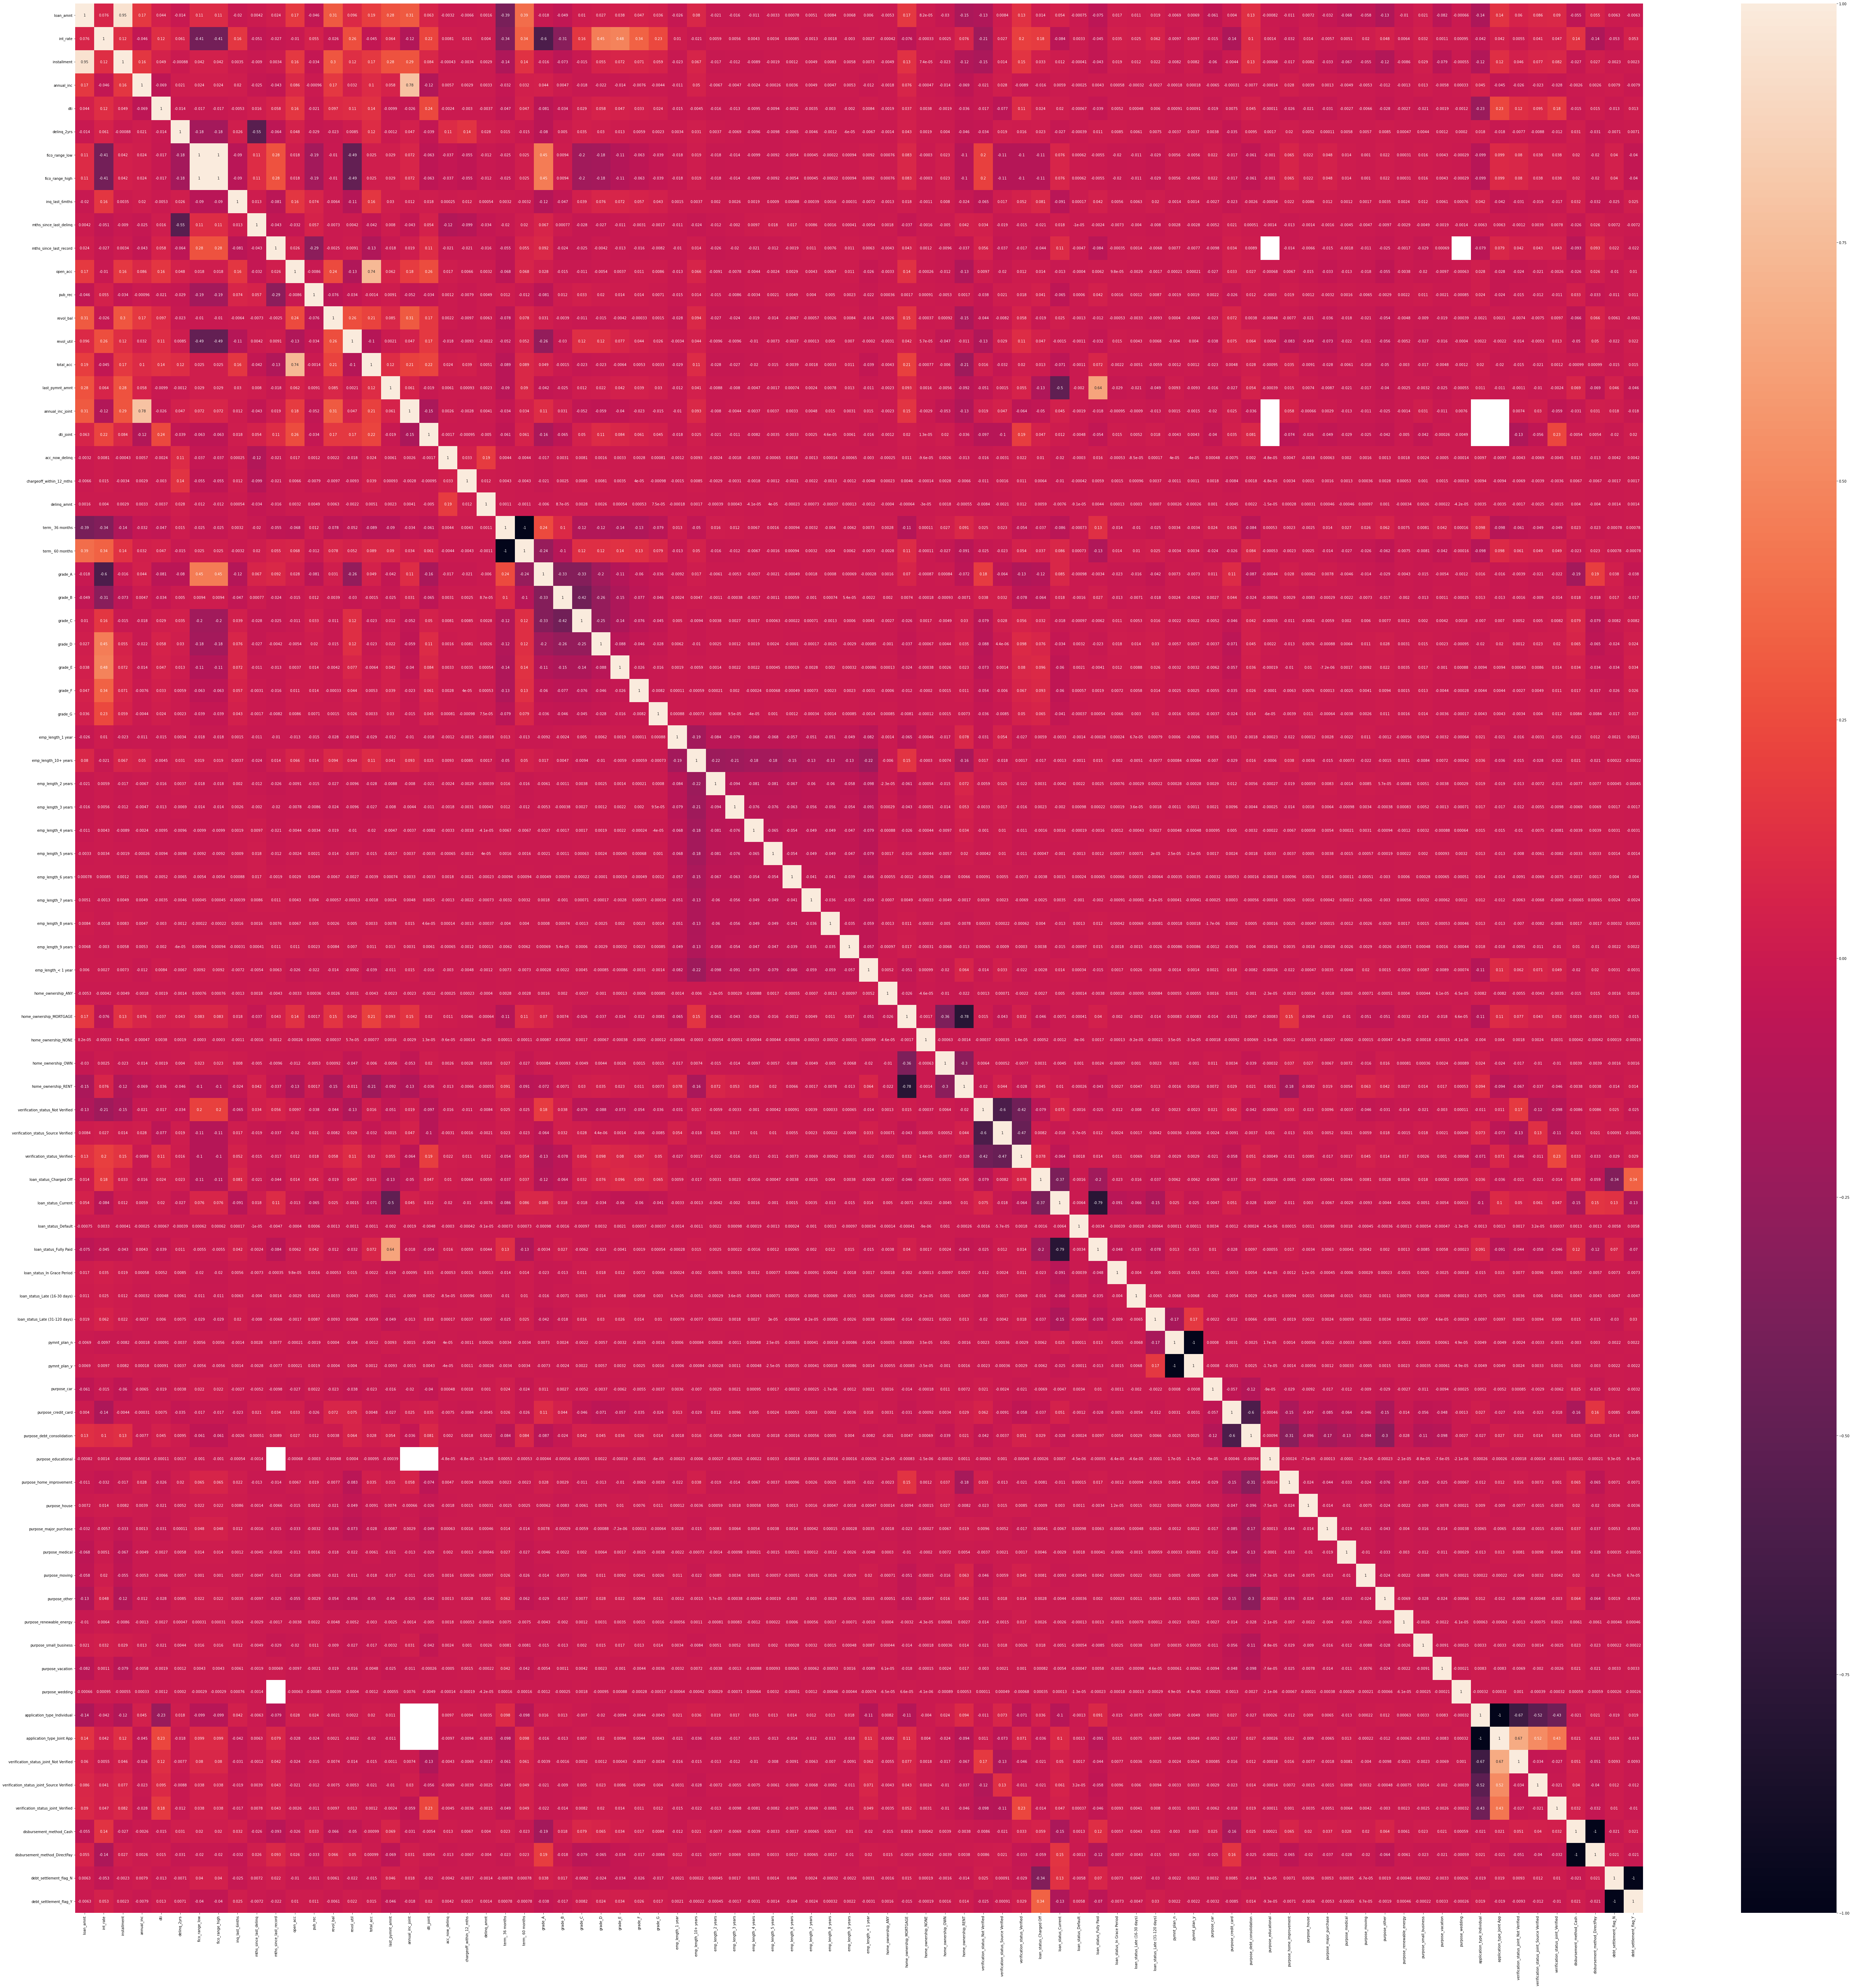

In [20]:
plt.subplots(figsize = (100,100))
hmap = sn.heatmap(corrMat, annot = True)
plt.show()

# Correlation notes -- lots of correlation between Grade and interest rate, credit score, and loan term, 
# likely because these parameters are assigned based on grade

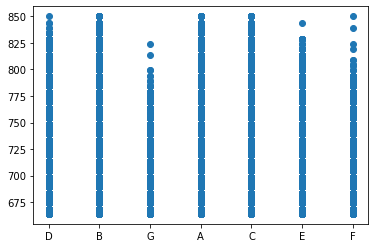

In [21]:
x = df2['grade']
y = df2['fico_range_high']

plt.scatter(x,y)
plt.show()

In [29]:
# group by grade and agg by average fico score
grade_fico = df2.groupby('grade').fico_range_high.agg('mean')

In [30]:
grade_fico.head()

grade
A    734.992479
B    705.438157
C    694.445701
D    689.011013
E    687.974620
Name: fico_range_high, dtype: float64

In [31]:
# group by performance and agg by average fico score
perf_fico = df2.groupby('loan_status').fico_range_high.agg('mean')

In [32]:
perf_fico

loan_status
Charged Off           693.024523
Current               707.086378
Default               709.000000
Fully Paid            704.651255
In Grace Period       695.787354
Late (16-30 days)     697.640480
Late (31-120 days)    696.769410
Name: fico_range_high, dtype: float64

In [71]:
perf_fico = df2.groupby('loan_status').fico_range_low.agg('mean')

In [72]:
perf_fico

loan_status
Charged Off           689.024446
Current               703.086079
Default               705.000000
Fully Paid            700.651027
In Grace Period       691.787354
Late (16-30 days)     693.640230
Late (31-120 days)    692.769207
Name: fico_range_low, dtype: float64

In [38]:
# Take a look at "default" and fico scores 

default = df2[df2['loan_status'] == 'Default']

In [40]:
default['fico_range_high']

6335       734.0
66579      704.0
71027      759.0
100593     664.0
129633     804.0
132688     784.0
139718     674.0
158392     689.0
191292     744.0
219585     664.0
272138     679.0
281876     709.0
305820     684.0
418218     749.0
467152     704.0
467430     709.0
511164     684.0
528943     729.0
558878     684.0
598838     669.0
828591     669.0
867518     714.0
955714     714.0
972357     664.0
1035450    699.0
1196120    704.0
1202192    729.0
1218166    819.0
1235007    794.0
1235345    729.0
1237561    694.0
1244742    714.0
1277789    694.0
1287822    684.0
1295251    679.0
1310228    689.0
1327657    669.0
1355914    664.0
Name: fico_range_high, dtype: float64

In [50]:
# Look at state vs loan status
# Would need population data as well -- maybe something to look into in the future

state = df.groupby(['loan_status', 'addr_state']).loan_status.agg('count')

In [53]:
state.to_csv('state.csv')

In [83]:
# Look at loan status vs debt to income ratio

status_dti = df2.groupby('loan_status').dti.agg('mean')

In [84]:
status_dti

loan_status
Charged Off           20.601559
Current               19.549017
Default               17.111842
Fully Paid            18.251159
In Grace Period       20.456609
Late (16-30 days)     19.421263
Late (31-120 days)    20.113047
Name: dti, dtype: float64

In [78]:
status_dti.to_csv('dti.csv')

In [56]:
# Grade vs dti

grade_dti = df2.groupby('grade').dti.agg('mean')

In [57]:
grade_dti

grade
A    16.583071
B    18.378462
C    20.039331
D    21.756561
E    22.869611
F    23.945990
G    25.111171
Name: dti, dtype: float64

In [58]:
df_dropped = df2[df2['loan_status'] != 'In Grace Period']

In [59]:
# Home ownership

home_own = df_dropped.groupby(['home_ownership','loan_status'])['loan_status'].count()
print(home_own)

home_ownership  loan_status       
ANY             Charged Off               56
                Current                  685
                Fully Paid               227
                Late (16-30 days)          1
                Late (31-120 days)        18
MORTGAGE        Charged Off            47790
                Current               397921
                Default                   17
                Fully Paid            208333
                Late (16-30 days)       1753
                Late (31-120 days)      8441
NONE            Current                    1
                Fully Paid                 3
OWN             Charged Off            14400
                Current                98260
                Default                    7
                Fully Paid             49011
                Late (16-30 days)        506
                Late (31-120 days)      2508
RENT            Charged Off            54011
                Current               326226
                Defa

In [76]:
home_final = home_own/df_dropped.groupby('home_ownership')['home_ownership'].count()*100

In [77]:
home_final.to_csv('home_final.csv')

In [73]:
status_income = df2.groupby('loan_status').annual_inc.agg(['min', 'max','median'])

In [74]:
status_income

,min,max,median
loan_status,,,
Charged Off,0.0,6500000.0,62000.0
Current,0.0,110000000.0,66000.0
Default,18000.0,360000.0,57196.0
Fully Paid,0.0,10999200.0,68000.0
In Grace Period,0.0,4000000.0,68500.0
Late (16-30 days),0.0,1000000.0,67000.0
Late (31-120 days),0.0,9573072.0,65000.0


In [75]:
status_income.to_csv('status_income.csv')

In [66]:
purpose = df_dropped.groupby(['purpose','loan_status'])['loan_status'].count()
print(purpose)

purpose   loan_status       
car       Charged Off           1006
          Current               8753
          Default                  3
          Fully Paid            5106
          Late (16-30 days)       29
                                ... 
vacation  Late (16-30 days)       25
          Late (31-120 days)     156
wedding   Charged Off              1
          Current                  5
          Fully Paid               2
Name: loan_status, Length: 72, dtype: int64


In [79]:
purpose_final = purpose/df_dropped.groupby('purpose')['purpose'].count()*100

In [80]:
purpose_final.to_csv('purpose.csv')